In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
data= pd.read_csv("telco.csv")

In [3]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,3323,3324,3325,3326,3327,3328,3329,3330,3331,3332
Leave,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
MemberWeeks,128.00,107.00,137.00,84.0,75.00,118.00,121.00,147.00,117.00,141.00,...,117.00,159.00,78.00,96.00,79.00,192.00,68.00,28.00,184.00,74.0
NewContract,1.00,1.00,1.00,0.0,0.00,0.00,1.00,0.00,1.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.0
IsData,1.00,1.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.0
DataAmount,2.70,3.70,0.00,0.0,0.00,0.00,2.03,0.00,0.19,3.02,...,0.39,0.00,0.23,0.36,0.00,2.67,0.34,0.00,0.00,3.7
Callcenter,1.00,1.00,0.00,2.0,3.00,0.00,3.00,0.00,1.00,0.00,...,5.00,1.00,2.00,1.00,2.00,2.00,3.00,2.00,2.00,0.0
CalMins,265.10,161.60,243.40,299.4,166.70,223.40,218.20,157.00,184.50,258.60,...,118.40,169.80,193.40,106.60,134.70,156.20,231.10,180.80,213.80,234.4
CalCounts,110.00,123.00,114.00,71.0,113.00,98.00,88.00,79.00,97.00,84.00,...,126.00,114.00,99.00,128.00,98.00,77.00,57.00,109.00,105.00,113.0
MonthlyFee,89.00,82.00,52.00,57.0,41.00,57.00,87.30,36.00,63.90,93.20,...,45.90,46.00,45.30,46.60,40.00,71.70,56.40,56.00,50.00,100.0
OverFee,9.87,9.78,6.06,3.1,7.42,11.03,17.43,5.16,17.58,11.10,...,12.47,9.89,5.85,14.24,9.49,10.78,7.67,14.44,7.98,13.3


In [4]:
data['Leave'].value_counts()
#가입한고객들의 평균 가입 기간.
data_range=data[data['Leave']==0]
data_range['MemberWeeks'].describe()


count    2850.000000
mean      100.793684
std        39.882350
min         1.000000
25%        73.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: MemberWeeks, dtype: float64

In [5]:
ex=[]
dr=data_range[data_range['MemberWeeks']==0]
for i in range(0,17):
    ex.append(len(data_range[(data_range['MemberWeeks']>0+(15*i))&(data_range['MemberWeeks']<15+(15*i))]))
ex


[39, 60, 121, 188, 300, 347, 385, 358, 321, 239, 140, 74, 47, 15, 6, 1, 1]

In [6]:
list17=[]
for i in range(0,17):
    list17.append(0+(15*i))
list17_2=[]
for i in range(0,17):
    list17_2.append([(0+(15*i),15+(15*i))])
list17_2

[[(0, 15)],
 [(15, 30)],
 [(30, 45)],
 [(45, 60)],
 [(60, 75)],
 [(75, 90)],
 [(90, 105)],
 [(105, 120)],
 [(120, 135)],
 [(135, 150)],
 [(150, 165)],
 [(165, 180)],
 [(180, 195)],
 [(195, 210)],
 [(210, 225)],
 [(225, 240)],
 [(240, 255)]]

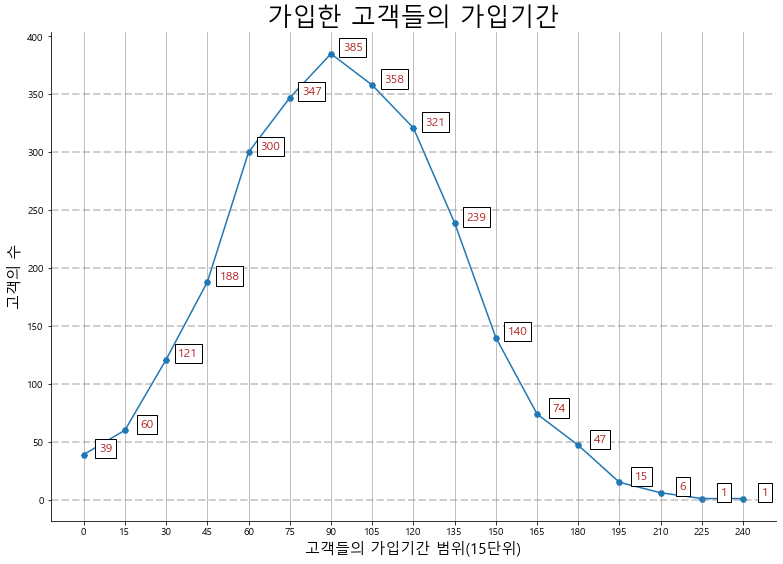

In [7]:
fig = plt.figure(figsize=(13,9))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.plot(list17, ex,marker="H")
plt.xlabel('고객들의 가입기간 범위(15단위)',fontsize=15)
plt.ylabel('고객의 수',fontsize=15)
plt.title('가입한 고객들의 가입기간',fontsize=25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
bbox = dict(
    boxstyle='square',
    facecolor='white',
)
plt.xticks(list17)
for i, v in enumerate(list17):         #그래프 값에 숫자 추가하는 과정
    ax.text(v+8, ex[i], ex[i],
            fontsize = 9, 
            color='firebrick',
            size=12,
            horizontalalignment='center',
            verticalalignment='bottom',
           bbox=bbox)
for y in range(0,400,50):
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5)
ax.xaxis.grid(True)
plt.show()

In [8]:
leave_data_range=data[data['Leave']==1]
leave_data_range['MemberWeeks'].describe()


count    483.000000
mean     102.664596
std       39.467820
min        1.000000
25%       76.000000
50%      103.000000
75%      127.000000
max      225.000000
Name: MemberWeeks, dtype: float64

In [9]:
lex=[]
for i in range(0,15):
    lex.append(len(leave_data_range[(leave_data_range['MemberWeeks']>0+(15*i))&(leave_data_range['MemberWeeks']<15+(15*i))]))
list15=[]
for i in range(0,15):
    list15.append(0+(15*i))
list15
lex


[4, 14, 17, 27, 46, 57, 71, 71, 59, 34, 24, 16, 6, 4, 2]

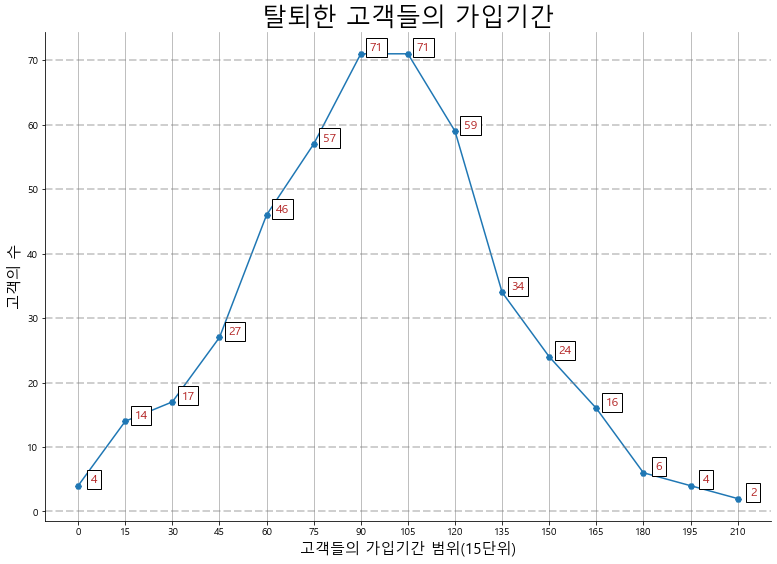

In [10]:
fig = plt.figure(figsize=(13,9)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
ax.plot(list15, lex,marker="H")
plt.xlabel('고객들의 가입기간 범위(15단위)',fontsize=15)
plt.ylabel('고객의 수',fontsize=15)
plt.title('탈퇴한 고객들의 가입기간',fontsize=25)
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김
bbox = dict( ## 텍스트 박스 스타일 지정
    boxstyle='square', # 박스 모양
    facecolor='white', # 박스 배경색
)

plt.xticks(list15)
for i, v in enumerate(list15):   #그래프 값에 숫자 추가하는 과정
    ax.text(v+5, lex[i], lex[i],
            fontsize = 9,
            color='firebrick',
            size=12,
            horizontalalignment='center',
            verticalalignment='bottom',
            bbox=bbox)
for y in range(0,80,10):
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5) ## 눈금선 생성
ax.xaxis.grid(True)
plt.show()

In [11]:
#두 그래프를 보면 90~105이상의 고객들의 수가 줄어드는 모습을 볼 수 있습니다. 또 신규 가입자수가 점점 많이 줄 고있습니다.

In [12]:
data['NewContract'].value_counts()
#요금제를 바꾼 고객들의 초과요금

1    3010
0     323
Name: NewContract, dtype: int64

In [13]:
ch_fee=data[(data['NewContract']==1)]
ch_fee['OverFee'].describe()

count    3010.000000
mean       10.035621
std         2.523754
min         0.000000
25%         8.302500
50%        10.070000
75%        11.760000
max        18.090000
Name: OverFee, dtype: float64

In [14]:
ch_fee=data[(data['NewContract']==0)]
ch_fee['OverFee'].describe()

count    323.000000
mean      10.199350
std        2.644023
min        3.040000
25%        8.390000
50%       10.150000
75%       11.970000
max       18.190000
Name: OverFee, dtype: float64

In [15]:
data['IsData'].value_counts()
#데이터 요금제에 따른 고객의 전화랑 전화수 요금 초과요금 조회, 로밍시간도 조회

0    2411
1     922
Name: IsData, dtype: int64

In [16]:
isdata1_calm=data[data['IsData']==1]['CalMins']
isdata1_calc=data[data['IsData']==1]['CalCounts']
isdata1_of=data[data['IsData']==1]['OverFee']
isdata1_rm=data[data['IsData']==1]['RoamingMin']
isdata1_mf=data[data['IsData']==1]['MonthlyFee']
isdata1=data[data['IsData']==1]

del isdata1['Leave']
del isdata1['MemberWeeks']
del isdata1['NewContract']
del isdata1['IsData']
del isdata1['DataAmount']
del isdata1['Callcenter']
isdata1.describe()

,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
count,922.000000,922.000000,922.000000,922.000000,922.000000
mean,179.626790,100.075922,75.891649,10.139740,10.231345
std,53.332223,19.722524,12.883640,2.507369,2.800338
min,2.600000,35.000000,26.000000,2.110000,0.000000
25%,143.500000,87.000000,67.400000,8.362500,8.400000
50%,180.900000,101.000000,75.900000,10.195000,10.300000
75%,216.300000,113.000000,84.300000,11.830000,12.100000
max,322.400000,163.000000,111.300000,18.090000,20.000000


In [17]:

isdata0=data[data['IsData']==0]

del isdata0['Leave']
del isdata0['MemberWeeks']
del isdata0['NewContract']
del isdata0['IsData']
del isdata0['DataAmount']
del isdata0['Callcenter']
isdata0.describe()

,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
count,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000
mean,179.831813,100.573206,48.815015,10.017740,10.239569
std,54.906108,20.202397,10.330170,2.546175,2.789161
min,0.000000,0.000000,14.000000,0.000000,0.000000
25%,143.700000,87.000000,42.000000,8.300000,8.500000
50%,179.200000,101.000000,49.000000,10.010000,10.300000
75%,216.450000,114.000000,56.000000,11.710000,12.100000
max,350.800000,165.000000,84.000000,18.190000,18.900000


In [18]:
isdata0.describe(percentiles=[0.25],include=None,exclude=None)

,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
count,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000
mean,179.831813,100.573206,48.815015,10.017740,10.239569
std,54.906108,20.202397,10.330170,2.546175,2.789161
min,0.000000,0.000000,14.000000,0.000000,0.000000
25%,143.700000,87.000000,42.000000,8.300000,8.500000
50%,179.200000,101.000000,49.000000,10.010000,10.300000
max,350.800000,165.000000,84.000000,18.190000,18.900000


In [19]:
isdata0.quantile(0.25)

CalMins       143.7
CalCounts      87.0
MonthlyFee     42.0
OverFee         8.3
RoamingMin      8.5
Name: 0.25, dtype: float64

In [31]:
def rating25 (arr):
    return arr.quantile(0.25)
def rating50 (arr):
    return arr.quantile(0.5)
def rating75 (arr):
    return arr.quantile(0.75)
#rating함수는 백분률을 표현하는데 describe에서는 백분율이나오지만 
#여기 agg에서는 없어서 따로 quantile를 이용하여 만든다음에 추가하였습니다.
(   data
    .groupby(['IsData'])
    .agg({'DataAmount':['mean','min',rating25,rating75,'max'],
           'CalMins':['mean','min',rating25,rating75,'max'],
           'CalCounts': ['mean','min',rating25,rating75,'max']}
        )
)

DataAmount                                  CalMins                \
             mean  min rating25 rating75   max        mean  min rating25   
IsData                                                                     
0        0.072086  0.0     0.00     0.00  0.51  179.831813  0.0    143.7   
1        2.763026  0.0     2.27     3.27  5.40  179.626790  2.6    143.5   

                         CalCounts                             
       rating75    max        mean min rating25 rating75  max  
IsData                                                         
0        216.45  350.8  100.573206   0       87      114  165  
1        216.30  322.4  100.075922  35       87      113  163

In [29]:
(
    data
    .groupby(['IsData'])
    .agg({'MonthlyFee': ['mean','min',rating25,rating75,'max'],
           'OverFee' :['mean','min',rating25,rating75,'max']})
)

MonthlyFee                                  OverFee                 \
             mean   min rating25 rating75    max      mean   min rating25   
IsData                                                                      
0       48.815015  14.0     42.0     56.0   84.0  10.01774  0.00   8.3000   
1       75.891649  26.0     67.4     84.3  111.3  10.13974  2.11   8.3625   

                        
       rating75    max  
IsData                  
0         11.71  18.19  
1         11.83  18.09

In [21]:
isdata0Calm=[]
dr=data_range[data_range['MemberWeeks']==0]
for i in range(0,17):
    ex.append(len(data_range[(data_range['MemberWeeks']>0+(15*i))&(data_range['MemberWeeks']<15+(15*i))]))
ex


[39,
 60,
 121,
 188,
 300,
 347,
 385,
 358,
 321,
 239,
 140,
 74,
 47,
 15,
 6,
 1,
 1,
 39,
 60,
 121,
 188,
 300,
 347,
 385,
 358,
 321,
 239,
 140,
 74,
 47,
 15,
 6,
 1,
 1]

In [22]:
#해지한 고객의 가입기간, 사용한 요금의 평균과 그래프를 추출하여 기존 고객과 비교

In [23]:
#추가요금이 있는 고객들의 데이터,전화량 로밍 평균과
#추가요금이 없는 고객들의 데이터,전화량 로밍 평균비교